# **1. Perkenalan Dataset**


Dataset yang digunakan adalah **Telco Customer Churn** yang bersumber dari Kaggle. Dataset ini berisi informasi mengenai pelanggan perusahaan telekomunikasi fiktif, yang bertujuan untuk memprediksi apakah seorang pelanggan akan berhenti berlangganan (churn) atau tidak. Masalah ini merupakan kasus klasifikasi biner.

Dataset ini mencakup fitur-fitur seperti demografi pelanggan, layanan yang mereka gunakan, dan detail akun mereka (misalnya, durasi berlangganan, biaya bulanan, dan total biaya). Memahami faktor-faktor yang mendorong churn sangat penting bagi perusahaan untuk merancang strategi retensi pelanggan yang efektif.

# **2. Import Library**

Pada tahap ini, kita akan mengimpor semua pustaka Python yang diperlukan untuk mengunduh data dari Kaggle, melakukan analisis data eksplorasi (EDA), dan preprocessing.

In [24]:
# Import library untuk akses Kaggle API
import os
import zipfile

# Import library untuk manipulasi data
import pandas as pd
import numpy as np

# Import library untuk visualisasi data (akan digunakan di EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing (akan digunakan di Data Preprocessing)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

Pada tahap ini, Kita akan memuat dataset "Telco Customer Churn" langsung dari Kaggle menggunakan Kaggle API.

In [25]:
# Langkah 1: Unggah kaggle.json dan atur izin
from google.colab import files

print("Silakan unggah file 'kaggle.json' Anda:")
uploaded = files.upload() # Ini akan membuka jendela pop-up untuk memilih file

for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

# Buat direktori .kaggle jika belum ada
!mkdir -p ~/.kaggle

# Pindahkan file kaggle.json ke direktori .kaggle
# Pastikan nama file yang diunggah sesuai, umumnya 'kaggle.json'
!mv kaggle.json ~/.kaggle/kaggle.json

# Atur izin file agar hanya Anda yang bisa membacanya (penting untuk keamanan)
!chmod 600 ~/.kaggle/kaggle.json

print("\nFile 'kaggle.json' berhasil diunggah dan diatur.")

Silakan unggah file 'kaggle.json' Anda:


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes

File 'kaggle.json' berhasil diunggah dan diatur.


In [26]:
# Nama dataset di Kaggle
kaggle_dataset_name = "blastchar/telco-customer-churn"
dataset_file = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Unduh dataset menggunakan Kaggle API
print(f"Mengunduh dataset {kaggle_dataset_name} dari Kaggle...")
# Gunakan parameter -o untuk menentukan direktori output (opsional, tapi bisa bantu debugging)
!kaggle datasets download -d {kaggle_dataset_name} -p .

# Ekstrak file CSV dari ZIP yang diunduh
print("Mengekstrak dataset...")
# Nama file ZIP yang diunduh adalah telco-customer-churn.zip
zip_filename = f"{kaggle_dataset_name.split('/')[-1]}.zip"
try:
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall('.')
    print(f"File '{zip_filename}' berhasil diekstrak.")
except FileNotFoundError:
    print(f"Error: File ZIP '{zip_filename}' tidak ditemukan. Unduh mungkin gagal.")
except Exception as e:
    print(f"Terjadi kesalahan saat mengekstrak dataset: {e}")

# Muat dataset ke dalam DataFrame pandas
try:
    df = pd.read_csv(dataset_file)
    print(f"\nDataset '{dataset_file}' berhasil dimuat!")
    print("\n5 baris pertama dataset:")
    print(df.head())
    print("\nInformasi dasar dataset:")
    df.info()
except FileNotFoundError:
    print(f"Error: File CSV '{dataset_file}' tidak ditemukan setelah ekstraksi. Mohon periksa nama file dan proses ekstraksi.")
except Exception as e:
    print(f"Terjadi kesalahan saat memuat dataset: {e}")

Mengunduh dataset blastchar/telco-customer-churn dari Kaggle...
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)
Mengekstrak dataset...
File 'telco-customer-churn.zip' berhasil diekstrak.

Dataset 'WA_Fn-UseC_-Telco-Customer-Churn.csv' berhasil dimuat!

5 baris pertama dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, kita akan melakukan EDA untuk mendapatkan pemahaman awal tentang karakteristik dataset Telco Customer Churn.

### Pemeriksaan Umum Dataset

In [27]:
print("\n--- Pemeriksaan Umum Dataset ---")
print("Ukuran dataset (baris, kolom):", df.shape)
print("\nInformasi dasar dataset:")
df.info()


--- Pemeriksaan Umum Dataset ---
Ukuran dataset (baris, kolom): (7043, 21)

Informasi dasar dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   

### Statistik Deskriptif untuk Fitur Numerik dan Kategorikal

In [28]:
print("\n--- Statistik Deskriptif untuk Fitur Numerik ---")
print(df.describe())

print("\n--- Statistik Deskriptif untuk Fitur Kategorikal ---")
print(df.describe(include='object'))


--- Statistik Deskriptif untuk Fitur Numerik ---
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

--- Statistik Deskriptif untuk Fitur Kategorikal ---
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \

### Jumlah Nilai Unik per Kolom

In [29]:
print("\n--- Jumlah Nilai Unik per Kolom (khususnya untuk kolom kategorikal) ---")
for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() < 20:
        print(f"- {col} ({df[col].nunique()} unique values): {df[col].unique()}")
    else:
        print(f"- {col} ({df[col].nunique()} unique values)")


--- Jumlah Nilai Unik per Kolom (khususnya untuk kolom kategorikal) ---
- customerID (7043 unique values): ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
- gender (2 unique values): ['Female' 'Male']
- SeniorCitizen (2 unique values): [0 1]
- Partner (2 unique values): ['Yes' 'No']
- Dependents (2 unique values): ['No' 'Yes']
- tenure (73 unique values)
- PhoneService (2 unique values): ['No' 'Yes']
- MultipleLines (3 unique values): ['No phone service' 'No' 'Yes']
- InternetService (3 unique values): ['DSL' 'Fiber optic' 'No']
- OnlineSecurity (3 unique values): ['No' 'Yes' 'No internet service']
- OnlineBackup (3 unique values): ['Yes' 'No' 'No internet service']
- DeviceProtection (3 unique values): ['No' 'Yes' 'No internet service']
- TechSupport (3 unique values): ['No' 'Yes' 'No internet service']
- StreamingTV (3 unique values): ['No' 'Yes' 'No internet service']
- StreamingMovies (3 unique values): ['No' 'Yes' 'No internet service']
- Cont

### Mengecek Missing Values (dan penanganan sementara TotalCharges untuk EDA)

In [30]:
# --- Mengecek Missing Values ---
print("\n--- Missing Values Sebelum Preprocessing ---")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Percentage (%)': missing_percentage})
print(missing_df[missing_df['Missing Count'] > 0])

# Catatan penting: Kolom 'TotalCharges' terdeteksi sebagai 'object' (string)
# Ini karena ada beberapa nilai kosong ' ' yang bukan NaN, dan perlu ditangani.
# Kita akan konversi ke numerik dan mengisinya di bagian preprocessing.
# Untuk EDA, kita akan ubah 'TotalCharges' ke numerik sementara untuk visualisasi.
df['TotalCharges_temp'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


--- Missing Values Sebelum Preprocessing ---
Empty DataFrame
Columns: [Missing Count, Percentage (%)]
Index: []


### Pemeriksaan Duplikasi Data

In [31]:
# --- Pemeriksaan Duplikasi Data ---
print("\n--- Pemeriksaan Duplikasi Data ---")
initial_rows = df.shape[0]
duplicated_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat (sebelum penghapusan customerID): {duplicated_rows}")

if duplicated_rows > 0:
    print("Ada baris duplikat yang terdeteksi. Ini akan ditangani di tahap preprocessing.")
else:
    print("Tidak ada baris duplikat yang terdeteksi dalam dataset.")


--- Pemeriksaan Duplikasi Data ---
Jumlah baris duplikat (sebelum penghapusan customerID): 0
Tidak ada baris duplikat yang terdeteksi dalam dataset.


### Visualisasi Distribusi Target (Churn)

<ipython-input-32-3368753888>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


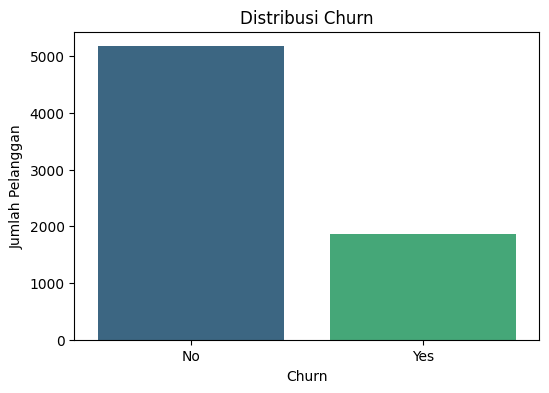


Distribusi kelas Churn:
No: 5174 (73.46%)
Yes: 1869 (26.54%)
Terlihat ada ketidakseimbangan kelas (imbalance).


In [32]:
# --- Visualisasi Distribusi Target (Churn) ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribusi Churn')
plt.xlabel('Churn')
plt.ylabel('Jumlah Pelanggan')
plt.show()

churn_counts = df['Churn'].value_counts()
print(f"\nDistribusi kelas Churn:")
print(f"No: {churn_counts.get('No', 0)} ({churn_counts.get('No', 0) / len(df) * 100:.2f}%)")
print(f"Yes: {churn_counts.get('Yes', 0)} ({churn_counts.get('Yes', 0) / len(df) * 100:.2f}%)")
print("Terlihat ada ketidakseimbangan kelas (imbalance).")

### Visualisasi Distribusi Fitur Numerik (Histogram)

<ipython-input-33-3986423231>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col].dropna(), kde=True, bins=30, palette='viridis')
<ipython-input-33-3986423231>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col].dropna(), kde=True, bins=30, palette='viridis')
<ipython-input-33-3986423231>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col].dropna(), kde=True, bins=30, palette='viridis')


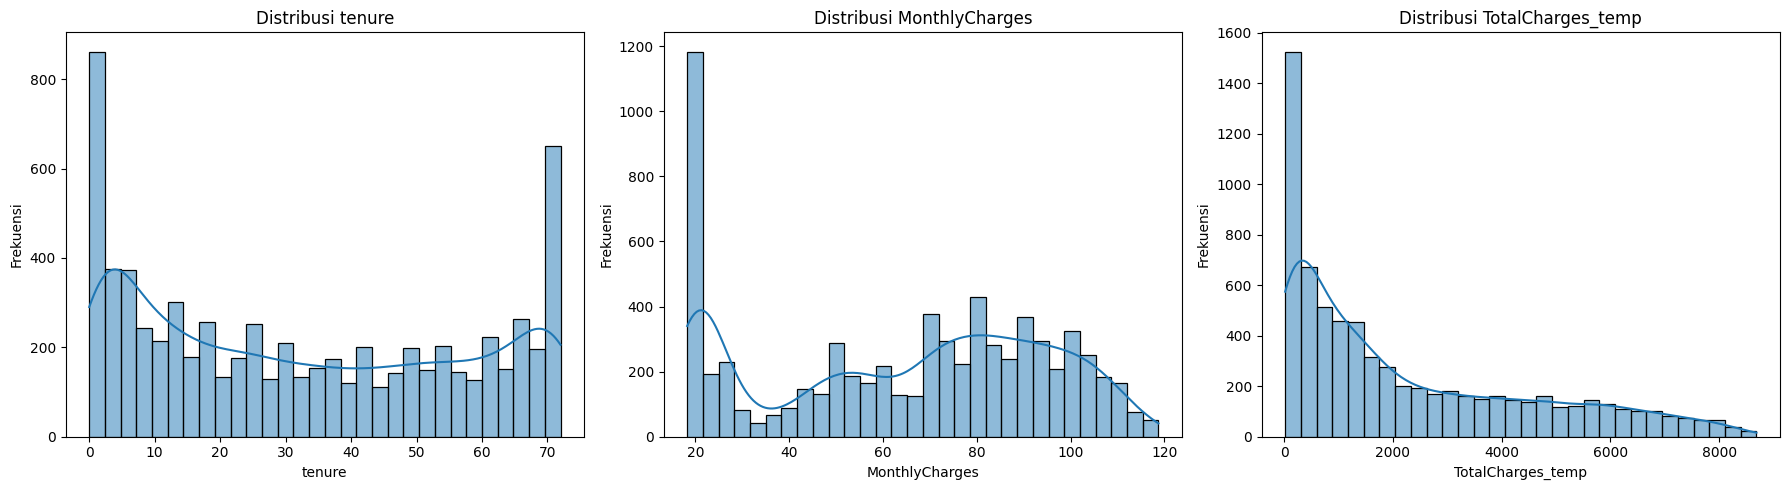

In [33]:
# --- Visualisasi Distribusi Fitur Numerik ---
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges_temp']
plt.figure(figsize=(18, 5))
for i, col in enumerate(numeric_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, palette='viridis')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

### Visualisasi Hubungan Fitur Numerik dengan Churn (Boxplot)

<ipython-input-34-748009689>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
<ipython-input-34-748009689>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
<ipython-input-34-748009689>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


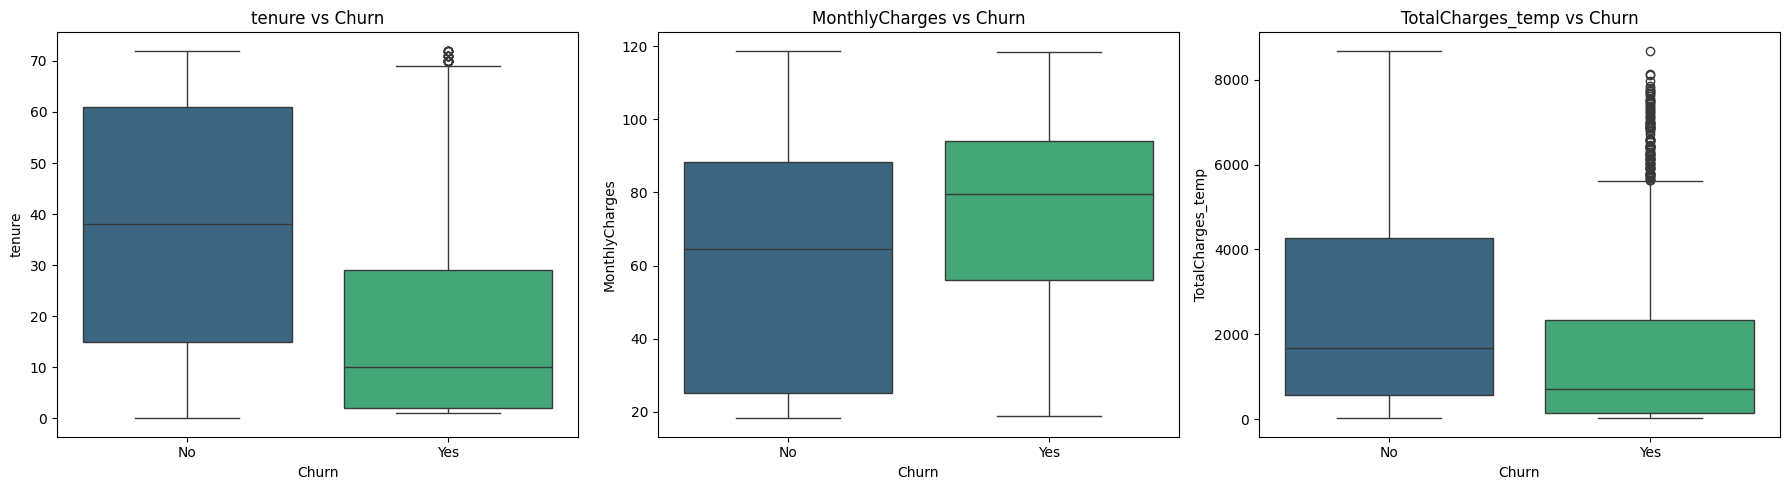

In [34]:
plt.figure(figsize=(18, 5))
for i, col in enumerate(numeric_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Visualisasi Hubungan Antar Fitur Kategorikal dan Churn

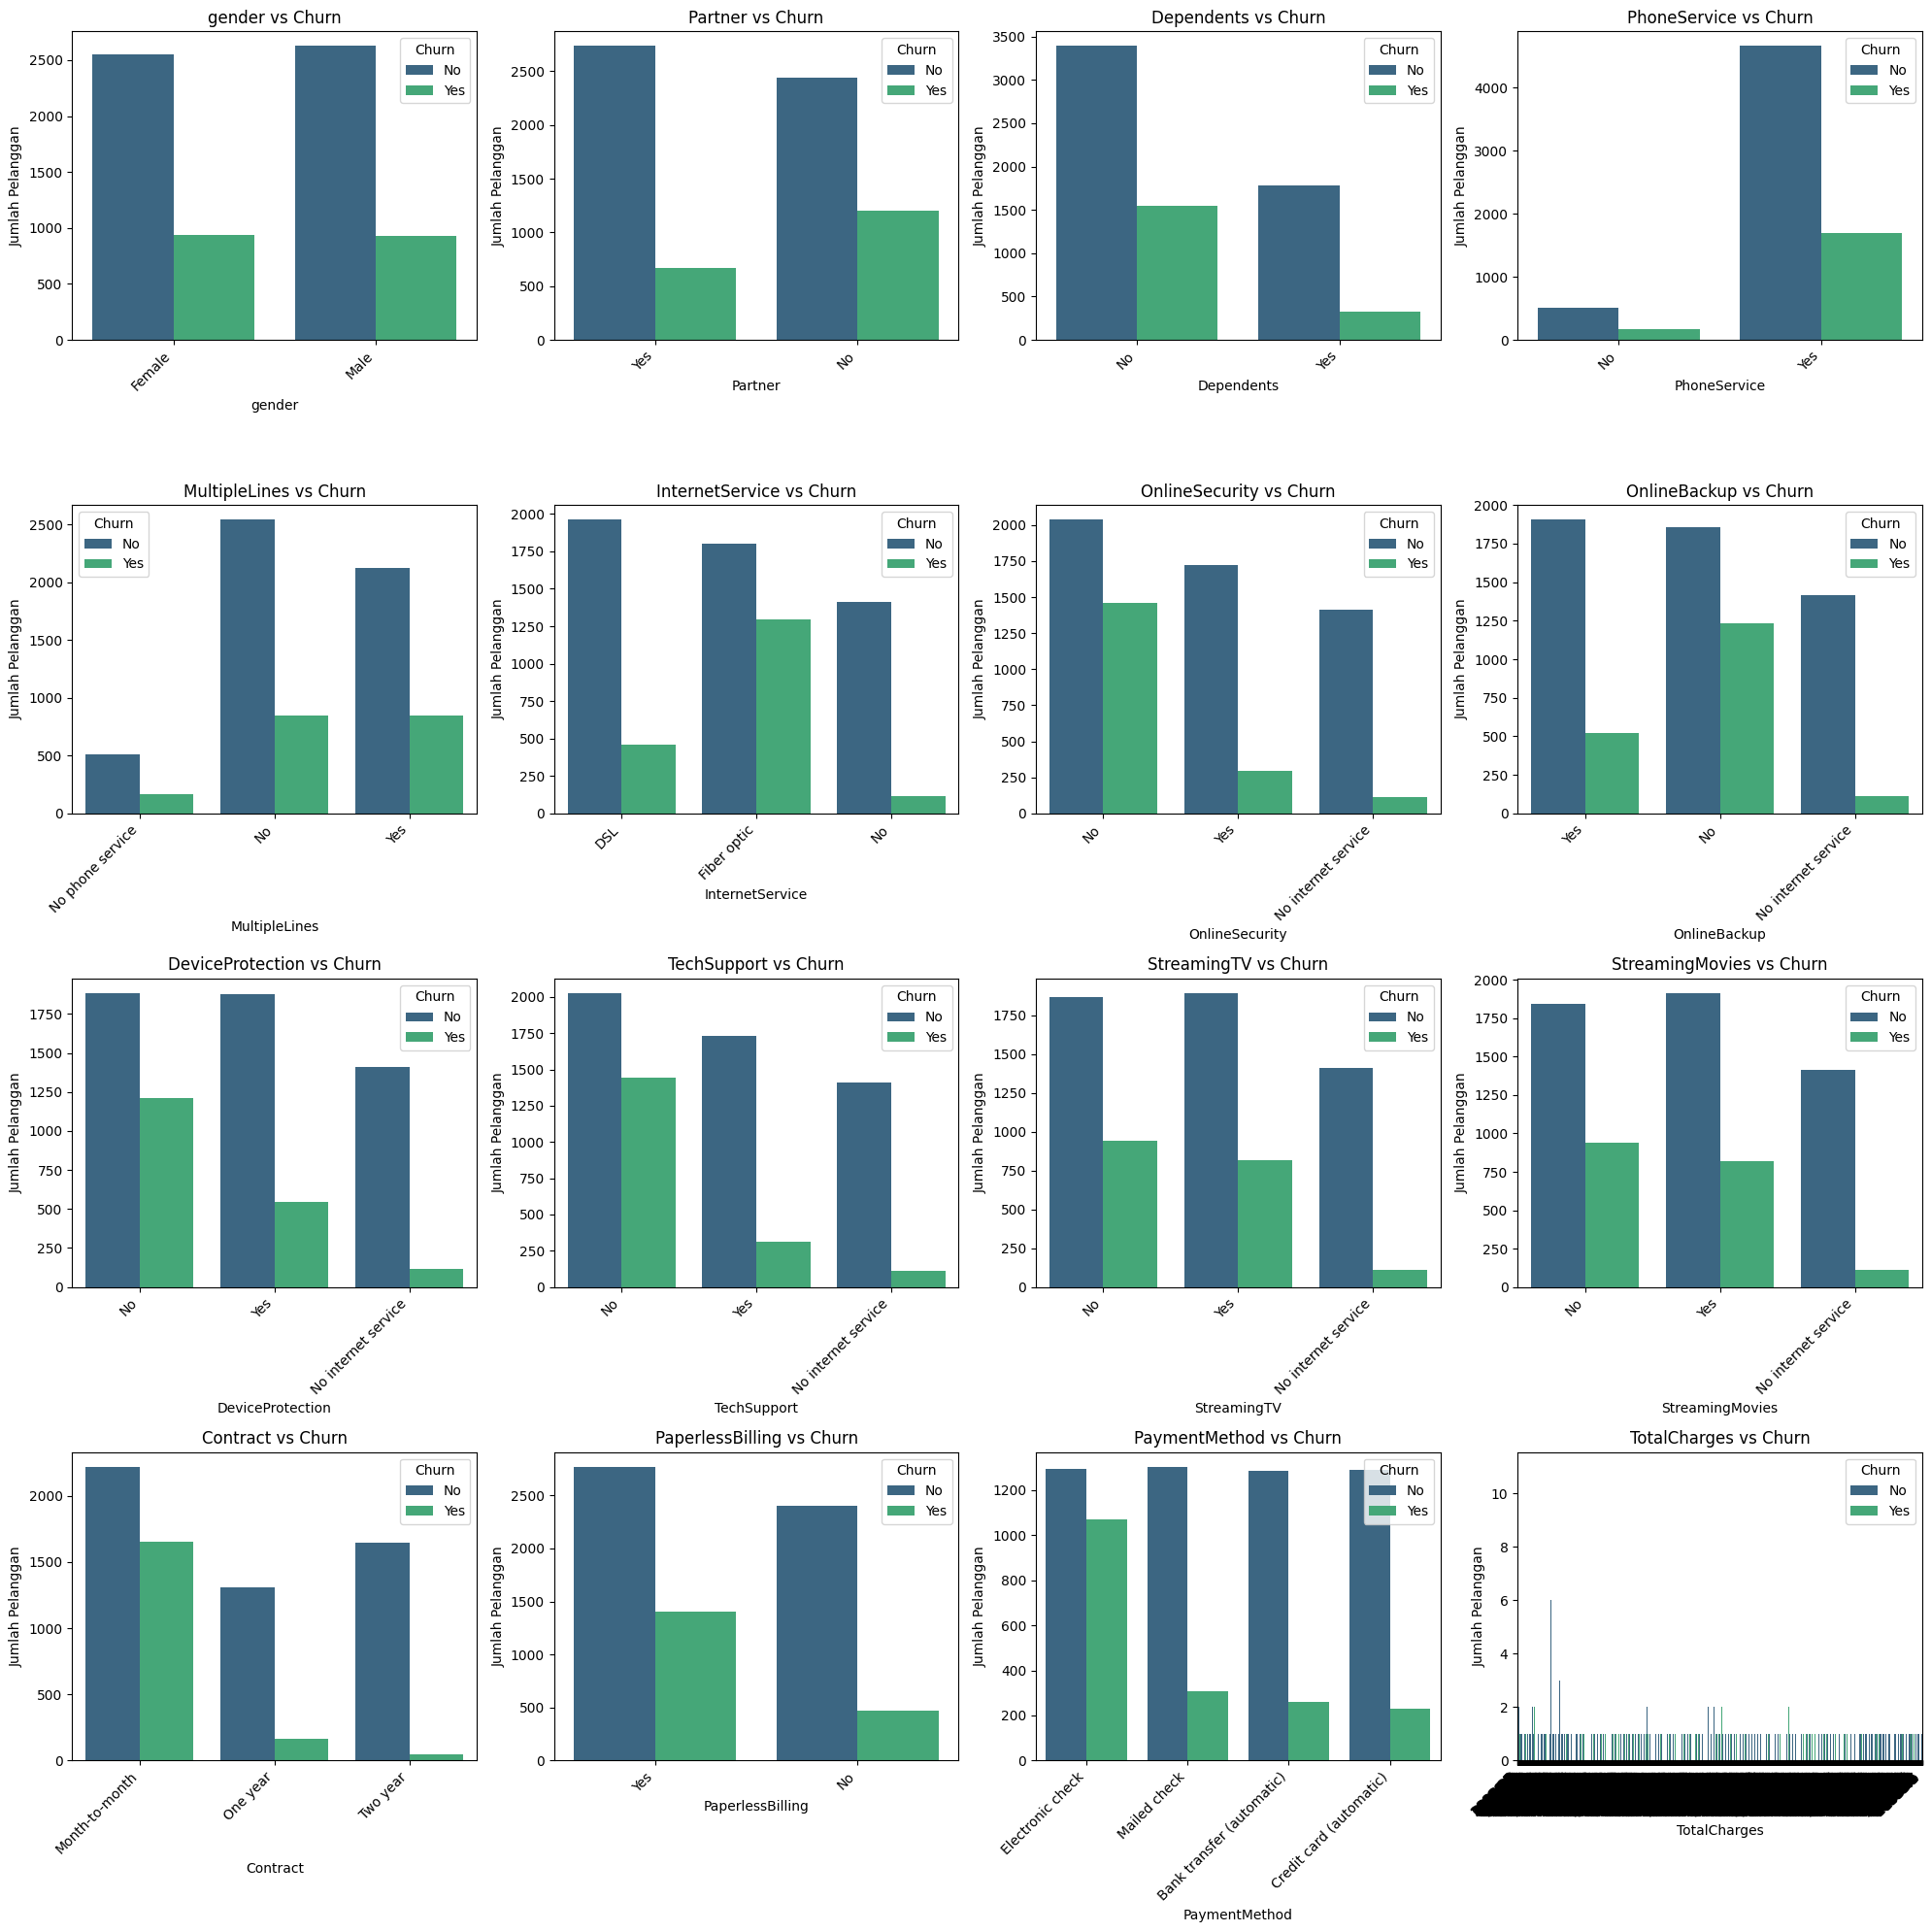

In [35]:
# --- Visualisasi Hubungan Antar Fitur Kategorikal dan Churn ---
categorical_features = df.select_dtypes(include='object').columns.tolist()
if 'customerID' in categorical_features:
    categorical_features.remove('customerID')
if 'Churn' in categorical_features:
    categorical_features.remove('Churn')

n_rows = (len(categorical_features) + 3) // 4
plt.figure(figsize=(20, n_rows * 5))
for i, col in enumerate(categorical_features):
    plt.subplot(n_rows, 4, i+1)
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

### Cleanup dan Penutup EDA

In [36]:
# Hapus kolom temporary TotalCharges_temp agar tidak mengganggu preprocessing selanjutnya
df.drop('TotalCharges_temp', axis=1, inplace=True)
print("\nEDA Selesai.")


EDA Selesai.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

### Inisialisasi dan Hapus Kolom 'customerID'

In [37]:
print("--- Memulai Data Preprocessing ---")

# Buat salinan DataFrame untuk preprocessing agar tidak mengubah DataFrame asli 'df'
df_preprocessed = df.copy()

# 1. Menghapus kolom 'customerID' karena tidak relevan untuk pemodelan
df_preprocessed.drop('customerID', axis=1, inplace=True)
print("1. Kolom 'customerID' telah dihapus.")

--- Memulai Data Preprocessing ---
1. Kolom 'customerID' telah dihapus.


### Mengatasi Missing Values di 'TotalCharges'

In [38]:
# 2. Mengatasi missing values di 'TotalCharges'
# Konversi 'TotalCharges' ke numerik, 'errors='coerce' akan mengubah ' ' menjadi NaN
df_preprocessed['TotalCharges'] = pd.to_numeric(df_preprocessed['TotalCharges'], errors='coerce')
# Isi NaN dengan median dari kolom TotalCharges
df_preprocessed['TotalCharges'].fillna(df_preprocessed['TotalCharges'].median(), inplace=True)
print("2. Missing values di 'TotalCharges' telah diisi dengan median setelah konversi ke numerik.")

2. Missing values di 'TotalCharges' telah diisi dengan median setelah konversi ke numerik.


<ipython-input-38-3171167269>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_preprocessed['TotalCharges'].fillna(df_preprocessed['TotalCharges'].median(), inplace=True)


### Mengubah 'No internet service' dan 'No phone service' menjadi 'No'

In [39]:
# 3. Mengubah 'No internet service' dan 'No phone service' menjadi 'No' untuk konsistensi
# Daftar kolom yang perlu dikonsolidasi
cols_to_consolidate_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_to_consolidate_internet:
    df_preprocessed[col] = df_preprocessed[col].replace('No internet service', 'No')

# Kolom MultipleLines memiliki 'No phone service'
df_preprocessed['MultipleLines'] = df_preprocessed['MultipleLines'].replace('No phone service', 'No')
print("3. Nilai 'No internet service' dan 'No phone service' telah dikonsolidasi menjadi 'No'.")

3. Nilai 'No internet service' dan 'No phone service' telah dikonsolidasi menjadi 'No'.


### Menangani Duplikat Data

In [40]:
# 4. Menangani data duplikat (seharusnya sudah dicek di EDA dan hasilnya tidak ada)
# Namun, langkah ini tetap penting sebagai bagian dari preprocessing pipeline yang komprehensif
initial_rows_preprocessed = df_preprocessed.shape[0]
df_preprocessed.drop_duplicates(inplace=True)
rows_after_duplicates = df_preprocessed.shape[0]
if initial_rows_preprocessed > rows_after_duplicates:
    print(f"4. Duplikat data dihapus. Jumlah baris: {initial_rows_preprocessed} -> {rows_after_duplicates}")
else:
    print("4. Tidak ada duplikat data yang ditemukan setelah penghapusan 'customerID' dan konsolidasi.")

4. Duplikat data dihapus. Jumlah baris: 7043 -> 7021


### Encoding Variabel Target 'Churn' dan Pemisahan X & y

In [41]:
# 5. Encoding variabel target 'Churn' (Yes/No) menjadi 1/0
df_preprocessed['Churn'] = df_preprocessed['Churn'].map({'Yes': 1, 'No': 0})
print("5. Variabel target 'Churn' telah di-encode (Yes=1, No=0).")

# Pisahkan fitur (X) dan target (y)
X = df_preprocessed.drop('Churn', axis=1)
y = df_preprocessed['Churn']
print("\nData fitur (X) dan target (y) telah dipisahkan.")

# Identifikasi kolom kategorikal dan numerik setelah semua preprocessing awal
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=np.number).columns

print(f"\nKolom kategorikal yang akan di-encode: {categorical_cols.tolist()}")
print(f"Kolom numerik yang akan di-scaling: {numerical_cols.tolist()}")

5. Variabel target 'Churn' telah di-encode (Yes=1, No=0).

Data fitur (X) dan target (y) telah dipisahkan.

Kolom kategorikal yang akan di-encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Kolom numerik yang akan di-scaling: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


### Definisi dan Penerapan ColumnTransformer

In [42]:
# 6. Preprocessing menggunakan ColumnTransformer
# Transformer untuk fitur numerik (StandardScaler)
# Transformer untuk fitur kategorikal (OneHotEncoder)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols), # Scaling fitur numerik
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) # One-Hot Encoding fitur kategorikal
    ])

# Terapkan preprocessor pada data fitur (X)
# fit_transform akan mempelajari parameter scaling/encoding dan menerapkannya
X_preprocessed_array = preprocessor.fit_transform(X)

### Mengambil Nama Fitur Baru dan Konversi ke DataFrame

In [43]:
# Mengambil nama-nama fitur baru setelah OneHotEncoder
# get_feature_names_out() sangat membantu untuk ini
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = list(numerical_cols) + list(ohe_feature_names)

# Konversi hasil preprocessing (sparse matrix atau array dense) menjadi DataFrame
X_processed_df = pd.DataFrame(X_preprocessed_array, columns=all_feature_names)

print("\nData setelah preprocessing dengan ColumnTransformer:")
print(X_processed_df.head())
print(f"\nUkuran data setelah preprocessing: {X_processed_df.shape}")


Data setelah preprocessing dengan ColumnTransformer:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Female  \
0      -0.440508 -1.282728       -1.164135     -0.997328            1.0   
1      -0.440508  0.062387       -0.262811     -0.176347            0.0   
2      -0.440508 -1.241967       -0.365914     -0.962760            0.0   
3      -0.440508  0.510759       -0.750058     -0.197869            0.0   
4      -0.440508 -1.241967        0.194503     -0.943556            1.0   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0          0.0         0.0          1.0            1.0             0.0  ...   
1          1.0         1.0          0.0            1.0             0.0  ...   
2          1.0         1.0          0.0            1.0             0.0  ...   
3          1.0         1.0          0.0            1.0             0.0  ...   
4          0.0         1.0          0.0            1.0             0.0  ...   

   StreamingMovies_Y

### Penyimpanan Data yang Sudah Dipreprocessing

In [44]:
# Opsional: Simpan data yang sudah dipreprocessing
# Ini adalah output penting untuk Kriteria 1 dan akan digunakan di Kriteria 2
output_dir = 'namadataset_preprocessing' # Sesuai dengan struktur folder yang diminta
os.makedirs(output_dir, exist_ok=True) # Buat folder jika belum ada

preprocessed_file_path_X = os.path.join(output_dir, 'telco_customer_churn_features_preprocessed.csv')
preprocessed_file_path_y = os.path.join(output_dir, 'telco_customer_churn_target_preprocessed.csv')

X_processed_df.to_csv(preprocessed_file_path_X, index=False)
y.to_csv(preprocessed_file_path_y, index=False) # y juga disimpan agar berpasangan

print(f"\nData fitur (X) yang sudah dipreprocessing disimpan di: {preprocessed_file_path_X}")
print(f"Data target (y) yang sudah dipreprocessing disimpan di: {preprocessed_file_path_y}")
print("\n--- Data Preprocessing Selesai ---")


Data fitur (X) yang sudah dipreprocessing disimpan di: namadataset_preprocessing/telco_customer_churn_features_preprocessed.csv
Data target (y) yang sudah dipreprocessing disimpan di: namadataset_preprocessing/telco_customer_churn_target_preprocessed.csv

--- Data Preprocessing Selesai ---
